In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()

In [2]:
df = pd.read_csv('..\datasets\era2-egypt.csv')
df.head()

,valid_time,u10,v10,t2m,msl,sp,tp,latitude,longitude
0,2000-01-01 00:00:00,1.099274,-2.358810,284.92096,101621.310,100019.430,0.000000e+00,29.75,30.75
1,2000-01-01 01:00:00,0.828003,-2.360291,285.02667,101608.125,100003.090,4.768372e-07,29.75,30.75
2,2000-01-01 02:00:00,0.766830,-2.276810,285.52856,101594.310,99985.484,7.152557e-06,29.75,30.75
3,2000-01-01 03:00:00,1.073685,-2.598694,286.16086,101627.060,100010.266,3.480911e-05,29.75,30.75
4,2000-01-01 04:00:00,1.334366,-2.828705,286.53143,101682.875,100062.050,1.621246e-05,29.75,30.75


In [3]:
df.describe()

,u10,v10,t2m,msl,sp,tp,latitude,longitude
count,222072.000000,222072.000000,222072.000000,222072.000000,222072.000000,222072.000000,222072.00,222072.00
mean,0.772024,-2.762412,295.428999,101408.013735,99822.887137,0.000002,29.75,30.75
std,2.226457,2.528391,7.539679,506.601080,484.026001,0.000034,0.00,0.00
min,-9.523529,-10.645569,276.765350,99425.875000,97837.480000,0.000000,29.75,30.75
25%,-0.591949,-4.497913,289.686928,101015.190000,99449.168500,0.000000,29.75,30.75
50%,0.765938,-3.107666,295.407625,101380.907500,99796.875000,0.000000,29.75,30.75
75%,1.991489,-1.586723,300.788588,101759.750000,100157.780000,0.000000,29.75,30.75
max,14.060547,11.950378,319.274840,103367.750000,101711.150000,0.003937,29.75,30.75


In [4]:
df.isna().sum()

valid_time    0
u10           0
v10           0
t2m           0
msl           0
sp            0
tp            0
latitude      0
longitude     0
dtype: int64

In [5]:
df = df.dropna().reset_index(drop=True)

In [6]:
# reset the index to valid_time
df = df.set_index('valid_time')

In [7]:
# cast the index to datetime datatype
df.index = pd.to_datetime(df.index)

In [8]:
# we will use only the data from 2000 to 2025
df = df.loc['2000-01-01 00:00:00':]

In [9]:
# convert temp from K to C
df['t2m'] = df['t2m'] - 273.15
# convert prec from m to mm
df['tp'] = df['tp'] * 1000

<Axes: title={'center': 'Land Surface Temp'}, xlabel='valid_time'>

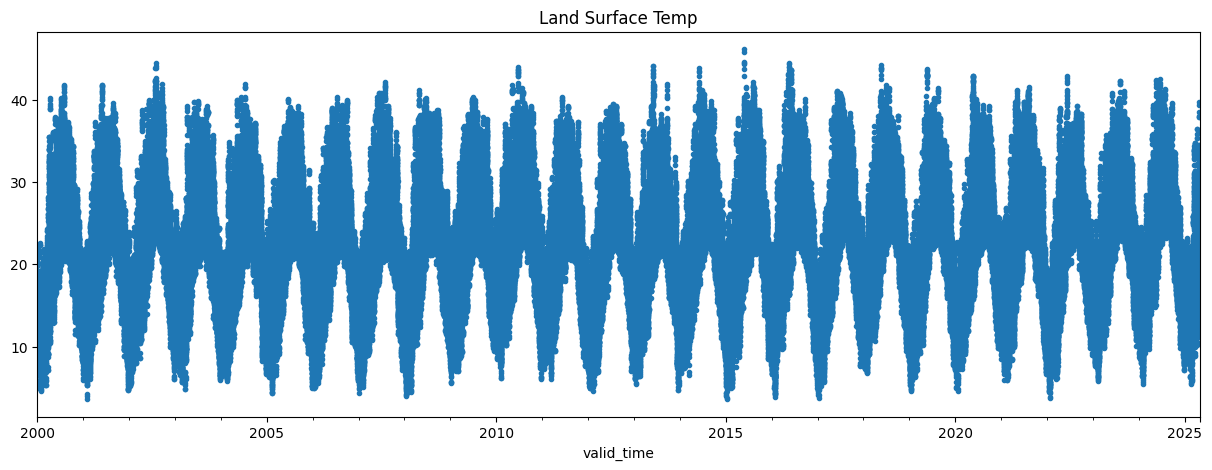

In [10]:
df['t2m'].plot(style='.', figsize=(15,5), title='Land Surface Temp')

<Axes: title={'center': 'Total precipitation'}, xlabel='valid_time'>

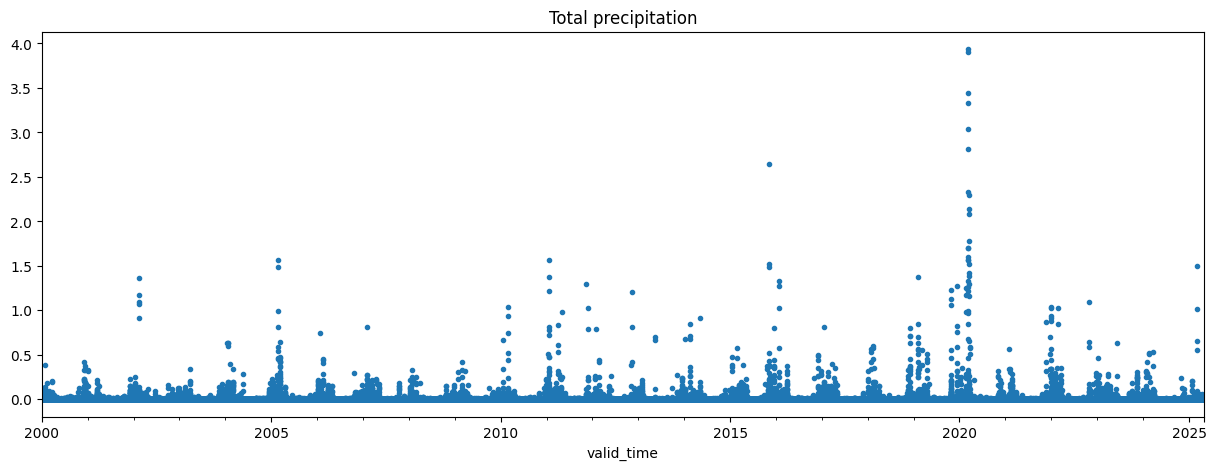

In [11]:
df['tp'].plot(style='.', figsize=(15,5), title='Total precipitation')

<Axes: title={'center': 'Surface Pressure'}, xlabel='valid_time'>

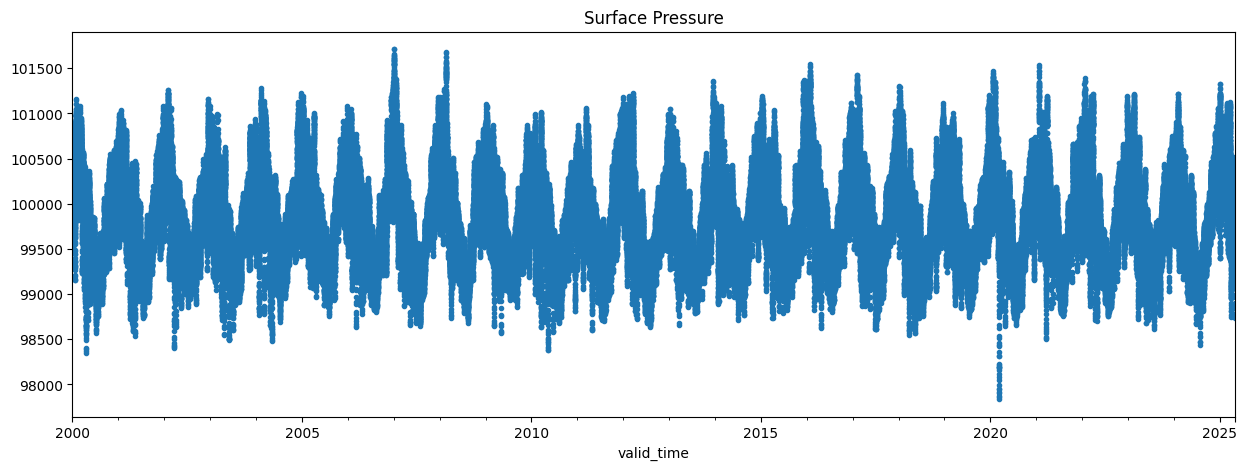

In [12]:
df['sp'].plot(style='.', figsize=(15,5), title='Surface Pressure')

<Axes: title={'center': 'Mean Sea Level Pressure'}, xlabel='valid_time'>

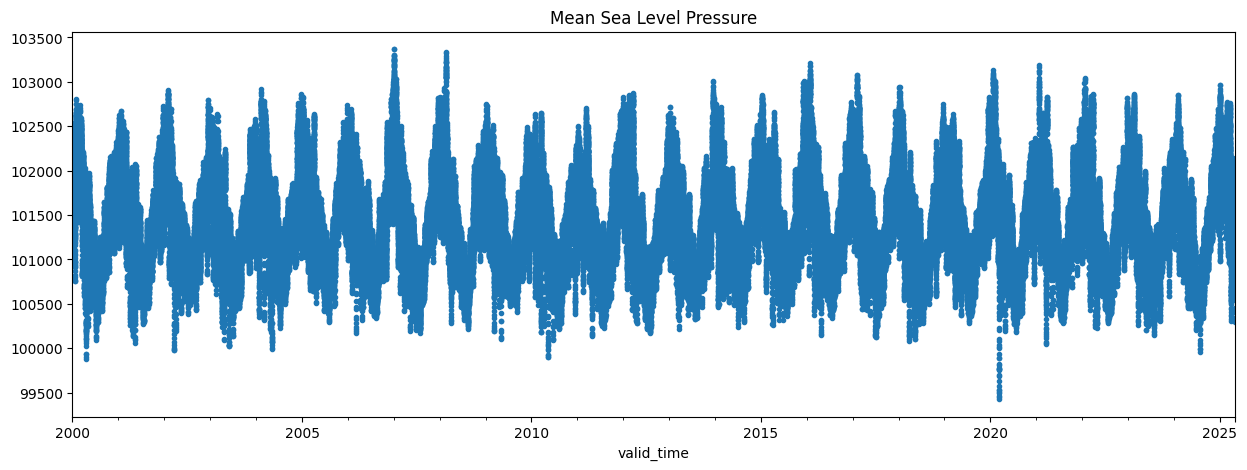

In [13]:
df['msl'].plot(style='.', figsize=(15,5), title='Mean Sea Level Pressure')

In [14]:
# sence msl and sp almost the same variable, drop msl
df = df.drop(columns=['msl'])

<Axes: title={'center': 'Wind Speed'}, xlabel='valid_time'>

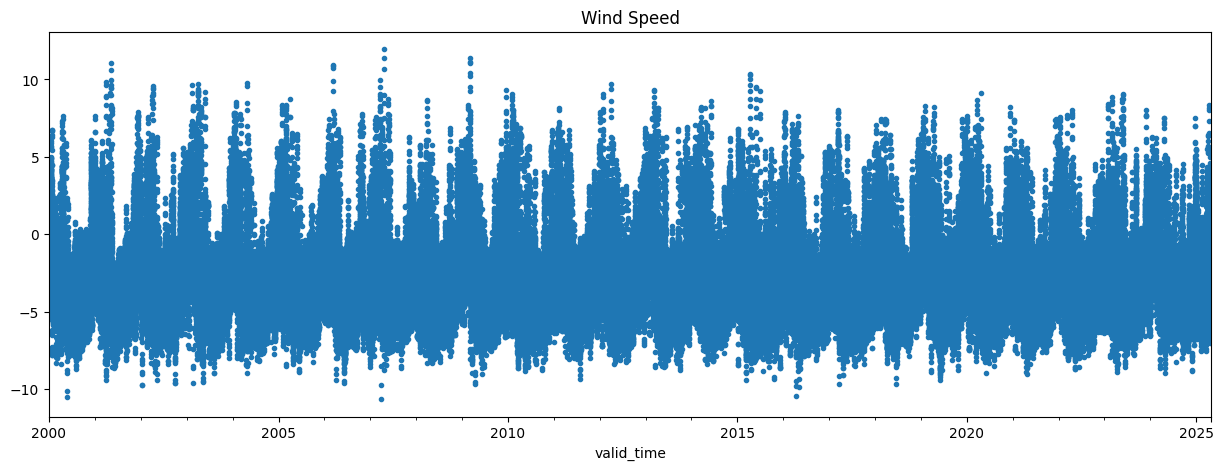

In [15]:
df['v10'].plot(style='.', figsize=(15,5), title='Wind Speed')

### 2 weeks inspection

In [16]:
rand_2_weeks = df[(df.index > '2010-01-01') & (df.index < '2010-01-14')]

<Axes: title={'center': 'Surface Temp'}, xlabel='valid_time'>

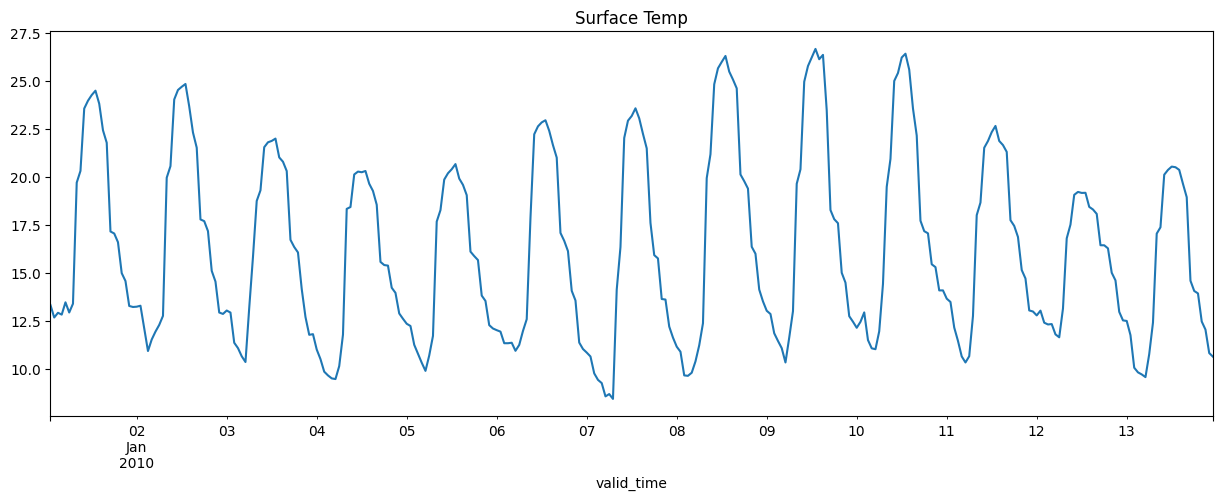

In [17]:
rand_2_weeks['t2m'].plot(style='-', figsize=(15, 5), title='Surface Temp')

looks like surface temp & wind speed has +ve correlation

<Axes: title={'center': 'Wind Speed'}, xlabel='valid_time'>

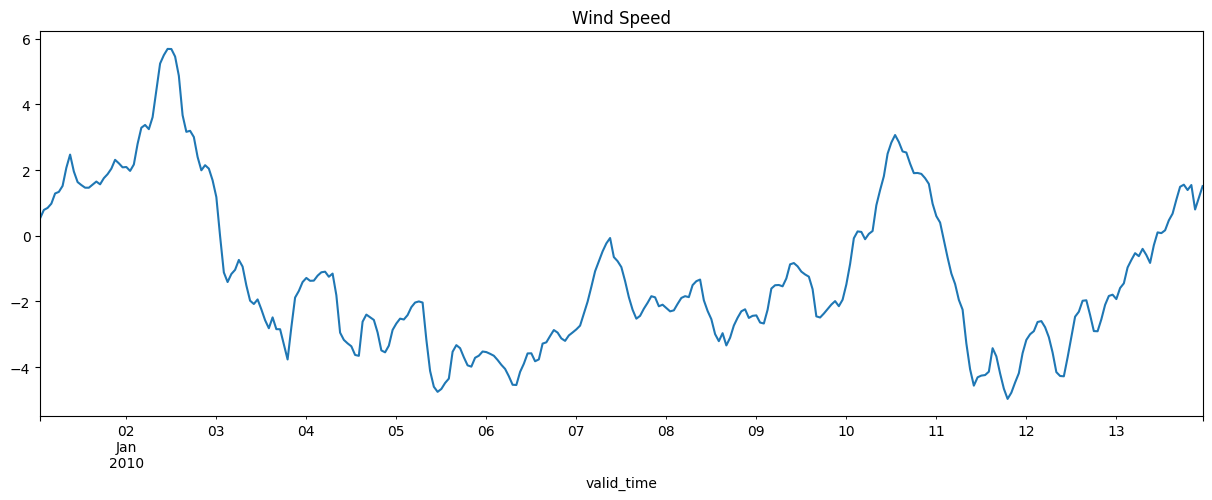

In [18]:
rand_2_weeks['v10'].plot(style='-', figsize=(15, 5), title='Wind Speed')

<Axes: title={'center': 'Surface Pressure'}, xlabel='valid_time'>

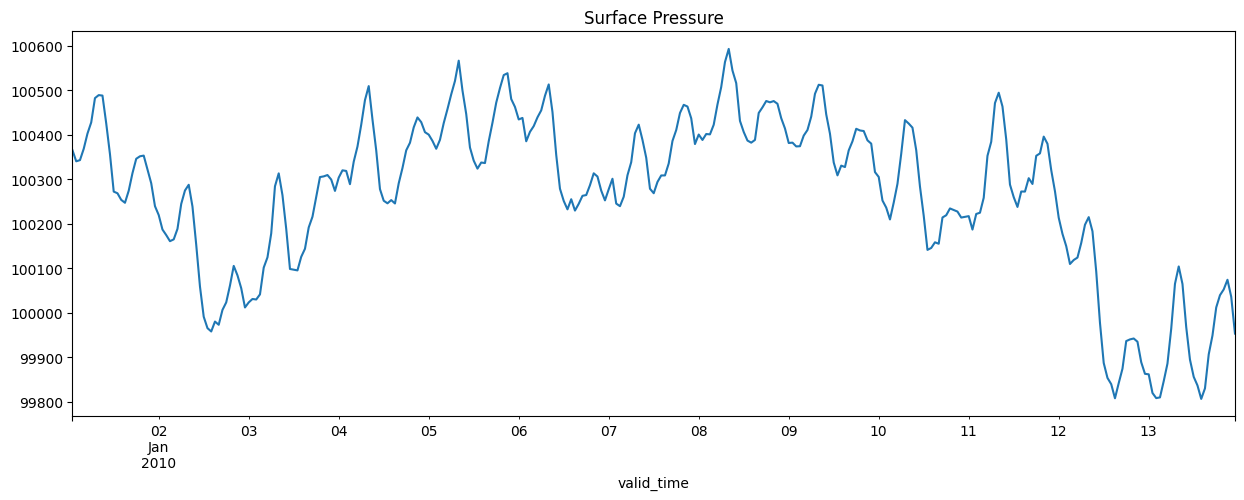

In [19]:
rand_2_weeks['sp'].plot(style='-', figsize=(15, 5), title='Surface Pressure')

surface pressure & (surface temp & wind speed) have -ve correlation, but need to investigate further

<Axes: title={'center': 'Total Precipitation'}, xlabel='valid_time'>

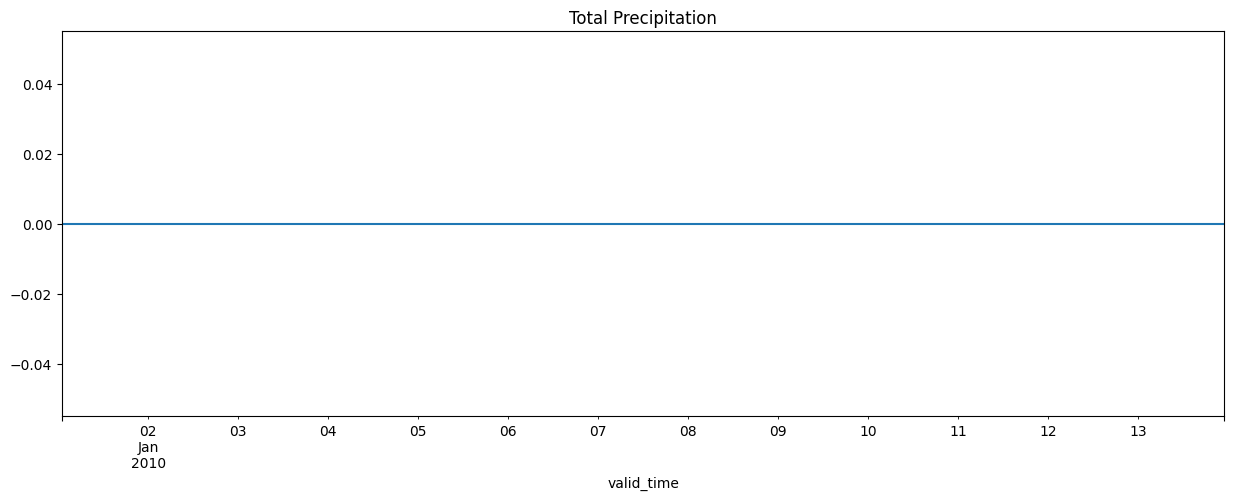

In [20]:
rand_2_weeks['tp'].plot(style='-', figsize=(15, 5), title='Total Precipitation')

In [21]:
# we don't need long, lat
df = df.drop(columns=['latitude', 'longitude'])

## Feature Engineering

In [22]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year

In [23]:
df.head()

,u10,v10,t2m,sp,tp,hour,dayofweek,month,quarter,year
valid_time,,,,,,,,,,
2000-01-01 00:00:00,1.099274,-2.358810,11.77096,100019.430,0.000000,0,5,1,1,2000
2000-01-01 01:00:00,0.828003,-2.360291,11.87667,100003.090,0.000477,1,5,1,1,2000
2000-01-01 02:00:00,0.766830,-2.276810,12.37856,99985.484,0.007153,2,5,1,1,2000
2000-01-01 03:00:00,1.073685,-2.598694,13.01086,100010.266,0.034809,3,5,1,1,2000
2000-01-01 04:00:00,1.334366,-2.828705,13.38143,100062.050,0.016212,4,5,1,1,2000


In [24]:
def wind_speed(u, v):
    return np.sqrt(u**2 + v**2)

def wind_dir(u, v):
    dir_rad = np.arctan2(u, v)
    return (180 + np.degrees(dir_rad)) % 360

In [25]:
u = df['u10'].values
v = df['v10'].values

df['wind_speed'] = wind_speed(u, v)
df['wind_dir'] = wind_dir(u, v)

In [26]:
df = df.drop(columns=['u10', 'v10'])

In [ ]:
#['t2m', 'sp', 'tp', 'hour', 'dayofweek', 'month', 'quarter', 'year', 'wind_speed', 'wind_dir']
df = df.rename(columns={
    't2m':'land_temp',
    'sp':'surface_pressure',
    'tp':'precipitation',
})

df = df[['hour', 'dayofweek', 'month', 'quarter', 'year', 'wind_speed', 'wind_dir', 'surface_pressure', 'precipitation', 'land_temp']]

In [53]:
df.to_csv('../datasets/preprocessed_data.csv', index=True)